# Exercise 1:

In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from scipy.special import gamma
%matplotlib notebook

In [2]:
healthclaims = np.loadtxt("clms.txt")

In [3]:
meanhc = np.mean(healthclaims)
medianhc = np.median(healthclaims)
maxhc = np.max(healthclaims)
minhc = np.min(healthclaims)
stdhc = np.std(healthclaims)
print("Mean Health Claim:    ", meanhc)
print("Median Health Claim:  ", medianhc)
print("Standard deviation:   ", stdhc)
print("Minimum Health Claim: ", minhc)
print("Maximum Health Claim: ", maxhc)

Mean Health Claim:     720.2779753272437
Median Health Claim:   172.21
Standard deviation:    3972.663756393663
Minimum Health Claim:  0.01
Maximum Health Claim:  227967.25


1.0000000000000322


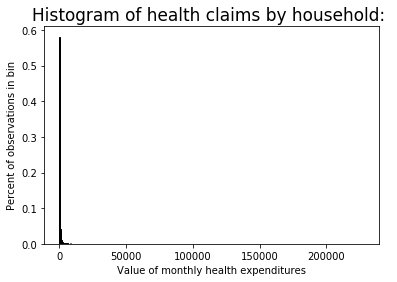

In [4]:
num_bins = 1000
weights = (1 / len(healthclaims)) * np.ones_like(healthclaims)
n, bin_cuts, patches = plt.hist(healthclaims, num_bins, weights=weights, edgecolor='k')
print(n.sum())

#plt.xticks(np.round_(bin_cuts, 1))
plt.title('Histogram of health claims by household: ', fontsize=17)
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.show()


0.8494208494208465


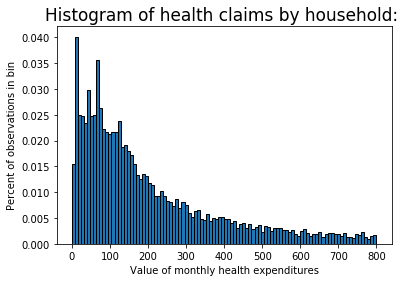

In [5]:
def plotfun():
    num_bins = 100
    weights = (1 / len(healthclaims)) * np.ones_like(healthclaims)
    n, bin_cuts, patches = plt.hist(healthclaims, num_bins, range=(0, 800), weights=weights, edgecolor='k')
    #plt.xticks(np.round_(bin_cuts, 1))
    plt.title('Histogram of health claims by household: ', fontsize=17)
    plt.xlabel(r'Value of monthly health expenditures')
    plt.ylabel(r'Percent of observations in bin')
    print(n.sum())

plotfun()
plt.show()

Text on the graphs


#### b)

In [6]:
# Define log likelihood function for the normal distribution
def gamma_pdf(x, alpha, beta):
    #try:
    G = math.gamma(alpha)
    #except OverflowError:
        #G = float('inf')
    pdf = (1/((beta**alpha)*G))*(x**(alpha-1))*(np.exp(-(x/beta)))
    return pdf


def log_lik_gamma(xvals, alpha, beta):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given gamma
    distribution parameters alpha and beta.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    alpha   = 
    beta   = 

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    #pdf_vals = stats.gamma.pdf(xvals, a=alpha, scale=(1 / beta))  #I'm not sure why this isn't working.
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val


In [7]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:

    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    alpha, beta = params
    xvals = args
    #T = len(xvals)
    #log_lik_val = -T * alpha * np.log(beta) + (alpha - 1) * np.sum(np.log(xvals)) - \
    #    (1 / beta) * np.sum(xvals) - T * math.gamma(alpha)
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [8]:
beta_0 = np.var(healthclaims) / meanhc
alpha_0 = meanhc / beta_0
params_0 = np.array([alpha_0, beta_0])
mleargs = (healthclaims)
output = opt.minimize(crit, params_0, args=mleargs, method ="L-BFGS-B", bounds=((1e-5, None), (1e-5, None)))
alpha_MLE, beta_MLE = output.x
loglikeval = -output.fun
print("MLE Alpha: ", alpha_MLE)
print("MLE Beta:  ", beta_MLE)
print("Log likelihood function: ", loglikeval)

MLE Alpha:  0.22175531882397229
MLE Beta:   21911.06469927622
Log likelihood function:  -82076.451605665


In [9]:
output

      fun: 82076.451605665
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00145519, 0.09167707])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([2.21755319e-01, 2.19110647e+04])

0.8494208494208465


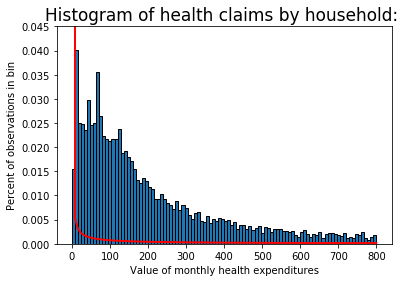

In [10]:
xvals = np.linspace(1e-5, 800, 100)
plotfun()
plt.plot(xvals, stats.gamma.pdf(xvals, a=alpha_MLE, scale=(beta_MLE)), 
         linewidth=2, color='r')
plt.ylim(0, 0.045)
plt.show()

In [11]:
# c)

def gengamma_pdf(xvals, alpha, beta, m):
    G = math.gamma(alpha/m)
    pdf = ((m / (beta ** alpha)) / G) * (xvals ** (alpha - 1)) * np.exp(-(xvals / beta) ** m)
    return pdf
    
def log_lik_gengamma(xvals, alpha, beta, m):
    pdf_vals = gengamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gengamma(params, *args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gengamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [12]:
params_MLE = np.array([alpha_MLE, beta_MLE, 1])
output = opt.minimize(crit_gengamma, params_MLE, args=healthclaims, method ="L-BFGS-B", bounds=((1e-5, None), (1e-5, None), (1e-5, None)))
alpha_MLE2, beta_MLE2, m_MLE2  = output.x
loglikeval2 = -output.fun
print("MLE Alpha: ", alpha_MLE2)
print("MLE Beta:  ", beta_MLE2)
print("MLE m:  ", m_MLE2)
print("Log likelihood function: ", loglikeval2)

MLE Alpha:  0.22173762513773726
MLE Beta:   21911.064427618683
MLE m:   0.997091828168986
Log likelihood function:  -82076.44679016387


0.8494208494208465


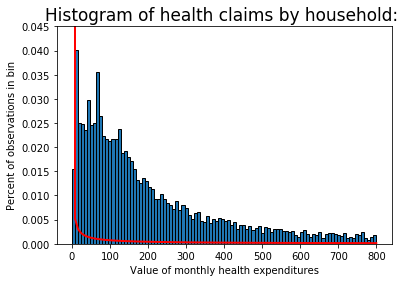

In [13]:
xvals = np.linspace(1e-5, 800, 100)
plotfun()
plt.plot(xvals, gengamma_pdf(xvals, alpha_MLE2, beta_MLE2, m_MLE2), 
         linewidth=2, color='r')
plt.ylim(0, 0.045)
plt.show()


In [14]:
# d) Generalized beta

def GB2(x, a, b, p, q):
    B = scipy.special.beta(p, q)
    pdf = (a*x ** (a*p - 1)) / ((b ** (a*p))*B*(1 + (x / b) ** a)**(p+q))
    return pdf
    
def log_lik_GB2(xvals, a, b, m, q):
    pdf_vals = GB2(xvals, a, b, m, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GB2(params, *args):
    a, b, m, q = params
    xvals = args
    log_lik_val = log_lik_GB2(xvals, a, b, m, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [15]:
q_MLE2 = 200
params_MLE3 = np.array([m_MLE2, (q_MLE2 ** (1/m_MLE2))*beta_MLE2, alpha_MLE2/m_MLE2, q_MLE2])
output = opt.minimize(crit_GB2, params_MLE3, args=healthclaims, method ="L-BFGS-B", bounds=((1e-5, None), (1e-5, None), (1e-5, None), (1e-5, None)))
a_MLE3, b_MLE3, m_MLE3, q_MLE3  = output.x
loglikeval3 = -output.fun
print("MLE a: ", a_MLE3)
print("MLE b:  ", b_MLE3)
print("MLE m:  ", m_MLE3)
print("MLE q:  ", q_MLE3)
print("Log likelihood function: ", loglikeval3)

MLE a:  0.0988213664522644
MLE b:   4450458.744838719
MLE m:   62.04816856275184
MLE q:   167.24388777924224
Log likelihood function:  -74873.29649074416


0.8494208494208465


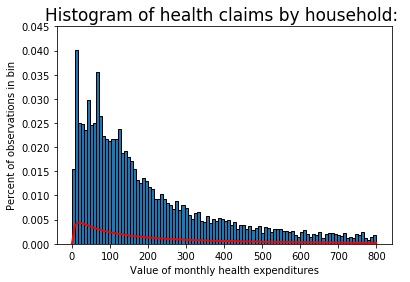

In [17]:
xvals = np.linspace(1e-5, 800, 100)
plotfun()
plt.plot(xvals, GB2(xvals, a_MLE3, b_MLE3, m_MLE3, q_MLE3), 
         linewidth=2, color='r')
plt.ylim(0, 0.045)
plt.show()


In [ ]:
# e) Likelihood ratio test

log_lik_GA = log_lik_gamma(healthclaims, alpha_MLE, beta_MLE)
log_lik_GB2 = log_lik_GB2(healthclaims, a_MLE3, b_MLE3, m_MLE3, q_MLE3)
LR_val = 2 * (log_lik_GB2 - log_lik_GA)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 4)
print('chi squared of GA with GB2 with 4 degrees of freedom p-value = ', pval_h0)


log_lik_GG = log_lik_gengamma(healthclaims, alpha_MLE2, beta_MLE2, m_MLE2)
LR_val = 2 * (log_lik_GB2 - log_lik_GG)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 4)
print('chi squared of GG with GB2 with 4 degrees of freedom p-value = ', pval_h0)


In [ ]:
# f)
from scipy.integrate import quad
integrand_GB2 = quad(GB2, 1000, np.inf, args=(a_MLE3, b_MLE3, m_MLE3, q_MLE3))

integrand_Gamma = quad(gamma_pdf, 1000, np.inf, args=(alpha_MLE, beta_MLE))
print("The liklihood of having a monthly health care claim of more than $1,000 under GB2", integrand_GB2[0])
print("The liklihood of having a monthly health care claim of more than $1,000 under GA", integrand_Gamma[0])

### Exercise 2

In [32]:
# Thanks to Tim's code that helped me get this to work.
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [45]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from scipy.special import gamma
import pandas as pd
from scipy.integrate import quad
import numpy.linalg as lin
from scipy.stats import norm

In [46]:
data = pd.read_csv("MacroSeries.txt", header=None)
data.head()

,0,1,2,3,4
0,1.128323e+07,8.040697e+06,1.120211e+07,1.008852,1.931398e+07
1,1.215464e+07,8.030754e+06,1.206726e+07,1.088112,2.080561e+07
2,1.097303e+07,8.650974e+06,1.089414e+07,0.911904,1.878300e+07
3,9.711635e+06,7.809971e+06,9.641815e+06,0.893986,1.662382e+07
4,9.245673e+06,6.912184e+06,9.179203e+06,0.961637,1.582621e+07


In [47]:
data.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

In [48]:
beta = 0.99
#z_0 = mu
alpha_guess = .5
rho_guess = 0
mu_guess = .5
sigma_guess = .5

In [49]:
def find_z(wt, kt, alpha):
    zt = np.log(wt/((1-alpha)*kt**alpha))
    return zt

def log_lik_fun(wt, kt, alpha, rho, mu, sigma):
    zt = find_z(wt, kt, alpha)
    log_lik_val = 0
    for i in range(len(zt)):
        if i == 0:
            pdf = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf = norm.pdf(zt[i], loc=(rho*zt[i-1] + (1-rho)*mu), scale=sigma)
        lnpdf = np.log(pdf)
        log_lik_val = lnpdf + log_lik_val
    return log_lik_val

def crit(params, *args):
    alpha, rho, mu, sigma = params
    wt, kt = args
    log_lik_val = log_lik_fun(wt, kt, alpha, rho, mu, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val
    

In [50]:
params_init = np.array([alpha_guess, rho_guess, mu_guess, sigma_guess])
MLE_args = (data.wt, data.kt)
output = opt.minimize(crit, params_init, args=(MLE_args), method = 'L-BFGS-B', 
                      bounds=((1e-5, 0.99), (-0.999, 0.99), (1e-5, None), (1e-5, None)))
alpha_MLE, rho_MLE, mu_MLE, sigma_MLE = output.x
IHVCV = output.hess_inv.todense()
print("MLE Alpha: ", alpha_MLE)
print("MLE Rho:  ", rho_MLE)
print("MLE mu:  ", mu_MLE)
print("MLE Sigma:  ", sigma_MLE)
print("Log likelihood function: ", -output.fun)
print("Inverse Hessian Variance-Covariance matrix")
print(IHVCV)

MLE Alpha:  0.5534007432114778
MLE Rho:   0.8246518345165023
MLE mu:   8.106593451693138
MLE Sigma:   0.09278024059344658
Log likelihood function:  95.85827569206461
Inverse Hessian Variance-Covariance matrix
[[  0.25141033   3.38310333  -3.12049007   0.11339717]
 [  3.38310333  51.18665902 -41.61085407   1.7147089 ]
 [ -3.12049007 -41.61085407  38.76052969  -1.39513554]
 [  0.11339717   1.7147089   -1.39513554   0.05774462]]


In [51]:
# b)

def get_z2(rt, kt, alpha):
    zt = np.log(rt/(alpha * kt ** (alpha - 1)))
    return zt

def log_lik_val2(rt, kt, alpha, rho, mu, sigma):
    zt = get_z2(rt, kt, alpha)
    log_lik_val = 0
    for i in range(len(zt)):
        if i == 0:
            pdf = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf = norm.pdf(zt[i], loc=(rho*zt[i - 1] + (1 - rho)*mu), scale=sigma)
        lnpdf = np.log(pdf)
        log_lik_val = lnpdf + log_lik_val
    return log_lik_val

def crit2(params, *args):
    alpha, rho, mu, sigma = params
    rt, kt = args
    log_lik_val = log_lik_val2(rt, kt, alpha, rho, mu, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [52]:
params_init = np.array([alpha_guess, rho_guess, mu_guess, sigma_guess])
MLE_args = (data.rt, data.kt)
output2 = opt.minimize(crit2, params_init, args=(MLE_args), method = 'L-BFGS-B', 
                      bounds=((1e-5, 0.999), (-0.999, 0.999), (1e-5, None), (1e-5, None)))
alpha_MLE, rho_MLE, mu_MLE, sigma_MLE = output2.x
loglikval_BM = -output2.fun
IHVCV = -output2.hess_inv.todense()
print("MLE Alpha: ", alpha_MLE)
print("MLE Rho:  ", rho_MLE)
print("MLE mu:  ", mu_MLE)
print("MLE Sigma:  ", sigma_MLE)
print("Log likelihood function: ", - output2.fun)
print("Inverse Hessian Variance-Covariance matrix")
print(IHVCV)

MLE Alpha:  0.9167124277423602
MLE Rho:   0.35413626237892243
MLE mu:   0.5348376764870151
MLE Sigma:   0.6905323103024797
Log likelihood function:  -87.7101907964443
Inverse Hessian Variance-Covariance matrix
[[-0.01044459  0.09979737  0.05423054 -0.08203279]
 [ 0.09979737 -1.50866872  0.08895145  1.32242451]
 [ 0.05423054  0.08895145 -1.00618911 -0.08679618]
 [-0.08203279  1.32242451 -0.08679618 -1.27415312]]


/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


In [53]:
# c)

params_init = np.array([alpha_guess, rho_guess, mu_guess, sigma_guess])
MLE_args = (data.wt, data.kt)
output1 =  opt.minimize(crit, params_init, args=(MLE_args), method = 'L-BFGS-B', 
                      bounds=((1e-5, 0.999), (-0.999, 0.999), (1e-5, None), (1e-5, None)))
alpha_mle, rho_mle, mu_mle, sigma_mle = output1.x


/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


In [55]:
z = get_z2(1, 7500000, alpha_mle)
mu_temp = rho_mle*10 + (1 - rho_mle) * mu_mle
print(mu_temp)
print(z)
print(sigma_mle)
cdf = stats.norm.cdf(z, mu_temp, sigma_mle)

probability = 1 - cdf
print("Probability intrest rate is greater than 1:  ", probability)

9.990676595241005
10.011503668338527
0.09587375606109784
Probability intrest rate is greater than 1:   0.4140128581118028


### Exercise 3

In [ ]:
%reset

In [57]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from scipy.special import gamma
import pandas as pd
from scipy.integrate import quad
import numpy.linalg as lin

In [58]:
incomedist = np.loadtxt("usincmoms.txt")
data = pd.read_table("usincmoms.txt", header = None)
data.columns = ["Percent", "Midpoint"]
percentage = incomedist[:, 0]
midpoints_thsd = incomedist[:, 1] / 1000
print(len(incomedist))

42


0.1921792129099999


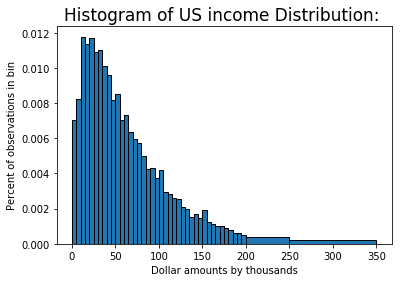

In [59]:
def graph_hist(percentage, midpoints_thsd):
    bins = np.append(np.linspace(0, 200, 41), [250, 350])
    weights = percentage.copy()
    weights[40] = weights[40]/ 10
    weights[41] = weights[41]/ 20
    weights = weights / 5
    # We divide by 5
    n, bin_cuts, patches = plt.hist(midpoints_thsd, bins=bins, weights=weights,range=(0,350), edgecolor='k')
    print(n.sum())

    #plt.xticks(np.round_(bin_cuts, 1))
    plt.title('Histogram of US income Distribution: ', fontsize=17)
    plt.xlabel(r'Dollar amounts by thousands')
    plt.ylabel(r'Percent of observations in bin')


graph_hist(percentage, midpoints_thsd)
plt.show()

In [60]:
# b) 
def lognormal_pdf(x, mu, sigma):
    expo = - ((np.log(x) - mu)**2)/(2*sigma**2)
    pdf = (1 / (x*sigma*np.sqrt(2*np.pi)))*np.exp(expo)
    return pdf

def model_moments(mu, sigma):
    bins = np.append(np.linspace(0, 200, 41), [250, 350])
    n = len(bins)
    moments = np.zeros(n - 1)
    errors = np.zeros(n - 1)
    for i in range(n - 1):
        pdf = lambda x: lognormal_pdf(x, mu, sigma) 
        (moments[i], errors[i]) = quad(pdf, bins[i],bins[i+1])
    return moments

def err_vec(percentage, mu, sigma, simple):
    moms_data = np.array(percentage)
    moms_model = model_moments(mu, sigma)
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion(params, *args):
    mu, sigma = params
    percentage, W = args
    err = err_vec(percentage, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    return crit_val

In [61]:
mu_init = np.log(np.mean(midpoints_thsd))
sig_init = np.log(np.std(midpoints_thsd))
params_init = np.array([mu_init, sig_init])
W_hat = np.diag(percentage)
gmm_args = (percentage, W_hat)
results1 = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results1.x
print('mu_GMM1=', mu_GMM1)
print('sig_GMM1=', sig_GMM1)

mu_GMM1= 3.8934455794272296
sig_GMM1= 0.9757363934058274


0.1921792129099999


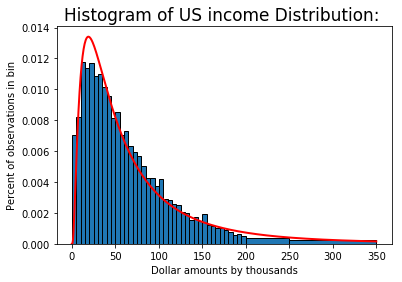

In [62]:
graph_hist(percentage, midpoints_thsd)
xvals = np.linspace(1e-6, 350, 600)
plt.plot(xvals, lognormal_pdf(xvals, mu_GMM1, sig_GMM1), linewidth=2, color='r')
plt.show()
# Note that we times it by five because the x grid bar length doesn't have a length of 1 but a length of 5. 


In [63]:
# c) 

def gamma_pdf(x, alpha, beta):
    G = math.gamma(alpha)
    pdf = 1/((beta**alpha)*G)*x**(alpha-1)*np.exp(-(x/beta))
    return pdf

def model_moments2(alpha, beta):
    bins = np.append(np.linspace(0, 200, 41), [250, 350])
    n = len(bins)
    moments = np.zeros(n - 1)
    errors = np.zeros(n - 1)
    for i in range(n - 1):
        pdf = lambda x: gamma_pdf(x, alpha, beta)
        (moments[i], errors[i]) = quad(pdf, bins[i],bins[i+1])
    return moments

def err_vec(percentage, alpha, beta, simple=False):
    moms_data = np.array(percentage)
    moms_model = model_moments2(alpha, beta)
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion(params, *args):
    alpha, beta = params
    percentage, W = args
    err = err_vec(percentage, alpha, beta, simple=False)
    crit_val = err.T @ W @ err
    return crit_val


In [64]:
alpha_init = 3
beta_init = 20
params_init = np.array([alpha_init, beta_init])
W_hat = np.diag(percentage)
gmm_args = (percentage, W_hat)
results2 = opt.minimize(criterion, params_init, method='L-BFGS-B', args=gmm_args, bounds=((1e-10, None), (1e-10, None)))
alpha_GMM2, beta_GMM2 = results2.x
print('alpha_GMM2=', alpha_GMM2)
print('beta_GMM2=', beta_GMM2)

alpha_GMM2= 1.3670768821564054
beta_GMM2= 48.061726505776726


0.1921792129099999


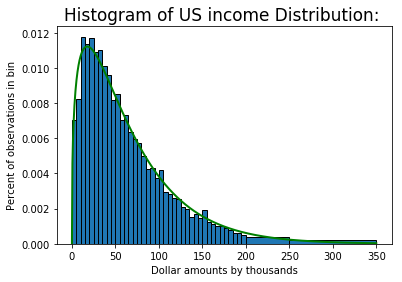

In [65]:
graph_hist(percentage, midpoints_thsd)
xvals = np.linspace(1e-9, 350, 600)
plt.plot(xvals, gamma_pdf(xvals, alpha_GMM2, beta_GMM2), 
         linewidth=2, color='g')
plt.show()
# Note that we times it by five because the x grid bar length doesn't have a length of 1 but a length of 5. 


0.1921792129099999


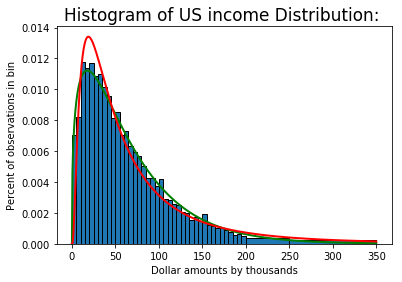

Error Log Normal 0.0355164813322797
Error Gamma 0.01408491948175785


In [66]:
# d)
graph_hist(percentage, midpoints_thsd)
xvals = np.linspace(1e-9, 350, 600)
plt.plot(xvals, gamma_pdf(xvals, alpha_GMM2, beta_GMM2), linewidth=2, color='g')
plt.plot(xvals, lognormal_pdf(xvals, mu_GMM1, sig_GMM1), linewidth = 2, color='r')
plt.show()
print("Error Log Normal", results1.fun)
print("Error Gamma", results2.fun)


In [69]:
# e)
err1 = err_vec(percentage, alpha_GMM2, beta_GMM2)
VCV2 = np.outer(err1, err1.T) / percentage.shape[0]
W_hat2 = lin.pinv(VCV2)

In [71]:
params_init2 = np.array([alpha_GMM2, beta_GMM2])
gmm_args2 = (percentage, W_hat2)
results = opt.minimize(criterion, params_init, args=(gmm_args), method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
alpha_GMM3, beta_GMM3 = results.x
print('alpha_GMM3', alpha_GMM3)
print('beta_GMM3', beta_GMM3)
print('Change in alpha_GMM3', alpha_GMM3 - alpha_GMM2)
print('Change in alpha_GMM3', beta_GMM3 - beta_GMM2)

alpha_GMM3 1.3670768821564054
beta_GMM3 48.061726505776726
Change in alpha_GMM3 0.0
Change in alpha_GMM3 0.0


In [ ]:
# I can't figure out why it's not giving me a different answer.  Look into if I have time later. 

## Exercise 4

In [140]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [141]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from scipy.special import gamma
import pandas as pd
import numpy.linalg as lin

In [142]:
data = pd.read_csv("MacroSeries.txt", header=None)
data.head()
data.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

In [143]:
def get_z(rt, kt, alpha):
    zt = np.log(rt/((alpha)*kt**(alpha - 1)))
    return zt

def moment1(ztp1, zt, rho, mu):
    mom1 = ztp1 - rho*zt - (1 - rho)*mu
    return mom1

def moment2(ztp1, rho, zt, mu):
    mom2 = (ztp1 - rho*zt - (1 - rho)*mu)*zt
    return mom2

def moment3(beta, alpha, ztp1, ktp1, ct, ctp1):
    mom3 = beta*alpha*(np.exp( ztp1)) * ktp1 ** (alpha - 1) * (ct / ctp1) - 1
    return mom3

def moment4(beta, alpha, ztp1, ktp1, ct, ctp1, wt):
    mom4 = (beta*alpha*(np.exp( ztp1)) * ktp1 ** (alpha - 1) * (ct / ctp1) - 1)*wt
    return mom4

def find_error(data, params, simple):
    alpha, beta, rho, mu = params
    ktp1 = data.kt[1:]
    kt = data.kt[:-1]
    ctp1 = data.ct[1:]
    ct = data.ct[:-1]
    wt = data.wt[:-1]
    ztp1 = get_z(data.rt, data.kt, alpha)[1:]
    zt = get_z(data.rt, data.kt, alpha)[:-1]
    mom1 = moment1(ztp1, zt, rho, mu)
    mom2 = moment2(ztp1, rho, zt, mu)
    mom3 = moment3(beta, alpha, ztp1, ktp1, ct, ctp1)
    mom4 = moment4(beta, alpha, ztp1, ktp1, ct, ctp1, wt)
    moms_data = np.array([mom1.mean(), mom2.mean(), mom3.mean(), mom4.mean()])
    moms_mod = np.array([1e-9, 1e-9, 1e-9, 1e-9])
    if simple:
        error = moms_mod - moms_data
    else:
        error = (moms_mod - moms_data) / moms_data
    return error

def crit(params, *args):
    alpha, beta, rho, mu = params
    data, W_hat = args
    error = find_error(data, params, simple=True)
    error_val = (error.T @ W_hat) @ error.T
    return error_val



In [150]:
alpha_guess = .5
beta_guess = .5
rho_guess = 0
mu_guess = 2
params = np.array([alpha_guess, beta_guess, rho_guess, mu_guess])
W_hat = np.identity(4)
args_GMM = (data, W_hat)
output = opt.minimize(crit, params, args=(args_GMM), method ='L-BFGS-B', 
                     bounds = ((1e-9, 0.999), (1e-9, 0.999), (-0.999, 0.999), (1e-9, None)))
alpha_GMM, beta_GMM, rho_GMM, mu_GMM = output.x
print('alpha = ', alpha_GMM)
print('beta = ', beta_GMM)
print('rho = ', rho_GMM)
print('mu = ', mu_GMM)


alpha =  0.8802314769035154
beta =  0.9829915808920227
rho =  0.0801052180489871
mu =  2.012263845420212


In [157]:
ztp1 = get_z(data.rt, data.kt, alpha_GMM)[1:]
zt = get_z(data.rt, data.kt, alpha_GMM)[:-1]

mom1 = moment1(ztp1, zt, rho_GMM, mu_GMM)
mom2 = moment2(ztp1, rho_GMM, zt, mu_GMM)
mom3 = moment3(beta_GMM, alpha_GMM, ztp1, data.kt[1:], data.ct[:-1], data.ct[1:])
mom4 = moment4(beta_GMM, alpha_GMM, ztp1, data.kt[1:], data.ct[:-1], data.ct[1:], data.wt)

print("Moment 1: ", mom1.mean())
print("Moment 2: ", mom2.mean())
print("Moment 3: ", mom3.mean())
print("Moment 4: ", mom4.mean())

params = np.array([alpha_GMM, beta_GMM, rho_GMM, mu_GMM])
err1 = find_error(data, params, simple=True)
print(err1)

Moment 1:  -0.0033735316858690555
Moment 2:  0.0033241908926312813
Moment 3:  -0.00609988696364336
Moment 4:  -0.04679513956795504
[ 0.00337353 -0.00332419  0.00609989  0.04679514]


In [158]:
VCV2 = np.outer(err1, err1.T) / len(data.rt)
W_hat2 = lin.pinv(VCV2)
args_GMM = (data, W_hat2)
output = opt.minimize(crit, params, args=(args_GMM), method ='L-BFGS-B', 
                     bounds = ((1e-9, 0.999), (1e-9, 0.999), (-0.999, 0.999), (1e-9, None)))
alpha_GMM2, beta_GMM2, rho_GMM2, mu_GMM2 = output.x
print('alpha = ', alpha_GMM2)
print('beta = ', beta_GMM2)
print('rho = ', rho_GMM2)
print('mu = ', mu_GMM2)
mom1 = moment1(ztp1, zt, rho_GMM2, mu_GMM2)
mom2 = moment2(ztp1, rho_GMM2, zt, mu_GMM2)
mom3 = moment3(beta_GMM2, alpha_GMM2, ztp1, data.kt[1:], data.ct[:-1], data.ct[1:])
mom4 = moment4(beta_GMM2, alpha_GMM2, ztp1, data.kt[1:], data.ct[:-1], data.ct[1:], data.wt)

print("Moment 1: ", mom1.mean())
print("Moment 2: ", mom2.mean())
print("Moment 3: ", mom3.mean())
print("Moment 4: ", mom4.mean())

alpha =  0.8802636230566346
beta =  0.9829915822290168
rho =  0.08035390675472168
mu =  2.0853725005959114
Moment 1:  -0.07060670878410717
Moment 2:  -0.13172286680177797
Moment 3:  -0.005563303050137224
Moment 4:  5010.712193395528
